# 04. Perceptron 04 - Implementation Part-I

### Perceptron (Artificial Neuron)
- A Perceptron is a single layer neural network
- It acts as a Linear Classifier, Binary Classification
- Loss Function : Binary Cross Entropy
    (-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

### Learning Goals
- How to implement Perceptron?
- Understanding Vectorization, writing efficient code without using for loop!
- What is the meaning of "Linear Classifier" ?

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Generating Data

In [116]:
X,Y=make_blobs?

In [ ]:
X,Y=make_blobs

In [117]:
X,Y=make_blobs

TypeError: 'function' object is not iterable

In [118]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)
print(X.shape,Y.shape)

(500, 2) (500,)


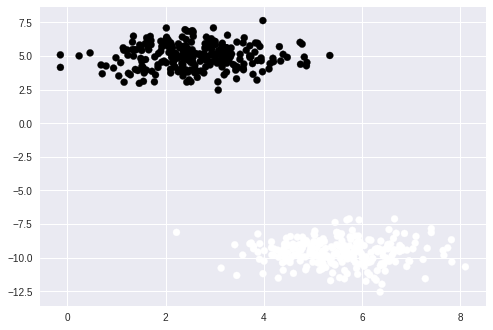

In [119]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

(500, 2) (500,)


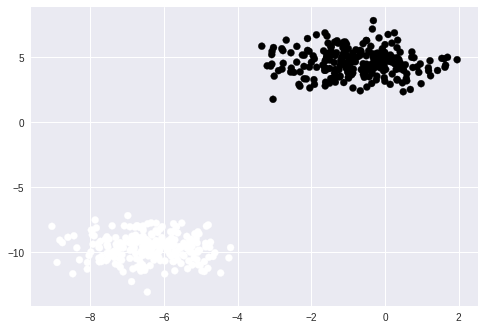

In [120]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=11)
print(X.shape,Y.shape)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

(500, 2) (500,)


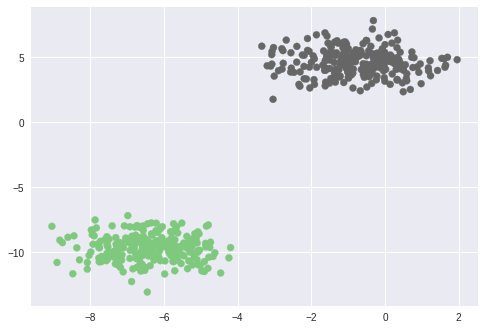

In [121]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=11)
print(X.shape,Y.shape)
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

### Model and helper functions

In [122]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [123]:
print(sigmoid(5))

0.9933071490757153


In [124]:
z=np.array([1,2,3,4,5])#Broadcasting - applying for every element of the array - Numpy array feature
print(sigmoid(z))

[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]


### Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the predictions

In [125]:
def predict(X,weights):
    """X -> mx(n+1) matrix , weights -> (nx1,) vector"""
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

In [126]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

In [127]:
def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    
    m=X.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights

In [128]:
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    # Modify the input to handle the bias term
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    # Init weights 0
    weights=np.zeros(X.shape[1]) # n+1 entries
    
    # Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        
        if (epoch%10)==0:
            l=loss(X,Y,weights)
            print("Epoch %d loss is %.4f"%(epoch,l))
    
    return weights

In [129]:
train(X,Y)

Epoch 0 loss is 0.0018
Epoch 10 loss is 0.0016
Epoch 20 loss is 0.0015
Epoch 30 loss is 0.0014
Epoch 40 loss is 0.0013
Epoch 50 loss is 0.0012
Epoch 60 loss is 0.0011
Epoch 70 loss is 0.0010
Epoch 80 loss is 0.0010
Epoch 90 loss is 0.0009


array([0.05805875, 0.58962195, 1.9390397 ])

In [130]:
weights=train(X,Y,maxEpochs=500)

Epoch 0 loss is 0.0018
Epoch 10 loss is 0.0016
Epoch 20 loss is 0.0015
Epoch 30 loss is 0.0014
Epoch 40 loss is 0.0013
Epoch 50 loss is 0.0012
Epoch 60 loss is 0.0011
Epoch 70 loss is 0.0010
Epoch 80 loss is 0.0010
Epoch 90 loss is 0.0009
Epoch 100 loss is 0.0009
Epoch 110 loss is 0.0008
Epoch 120 loss is 0.0008
Epoch 130 loss is 0.0008
Epoch 140 loss is 0.0007
Epoch 150 loss is 0.0007
Epoch 160 loss is 0.0007
Epoch 170 loss is 0.0007
Epoch 180 loss is 0.0006
Epoch 190 loss is 0.0006
Epoch 200 loss is 0.0006
Epoch 210 loss is 0.0006
Epoch 220 loss is 0.0006
Epoch 230 loss is 0.0005
Epoch 240 loss is 0.0005
Epoch 250 loss is 0.0005
Epoch 260 loss is 0.0005
Epoch 270 loss is 0.0005
Epoch 280 loss is 0.0005
Epoch 290 loss is 0.0005
Epoch 300 loss is 0.0004
Epoch 310 loss is 0.0004
Epoch 320 loss is 0.0004
Epoch 330 loss is 0.0004
Epoch 340 loss is 0.0004
Epoch 350 loss is 0.0004
Epoch 360 loss is 0.0004
Epoch 370 loss is 0.0004
Epoch 380 loss is 0.0004
Epoch 390 loss is 0.0004
Epoch 400 l

In [131]:
weights=train(X,Y,maxEpochs=1000)

Epoch 0 loss is 0.0018
Epoch 10 loss is 0.0016
Epoch 20 loss is 0.0015
Epoch 30 loss is 0.0014
Epoch 40 loss is 0.0013
Epoch 50 loss is 0.0012
Epoch 60 loss is 0.0011
Epoch 70 loss is 0.0010
Epoch 80 loss is 0.0010
Epoch 90 loss is 0.0009
Epoch 100 loss is 0.0009
Epoch 110 loss is 0.0008
Epoch 120 loss is 0.0008
Epoch 130 loss is 0.0008
Epoch 140 loss is 0.0007
Epoch 150 loss is 0.0007
Epoch 160 loss is 0.0007
Epoch 170 loss is 0.0007
Epoch 180 loss is 0.0006
Epoch 190 loss is 0.0006
Epoch 200 loss is 0.0006
Epoch 210 loss is 0.0006
Epoch 220 loss is 0.0006
Epoch 230 loss is 0.0005
Epoch 240 loss is 0.0005
Epoch 250 loss is 0.0005
Epoch 260 loss is 0.0005
Epoch 270 loss is 0.0005
Epoch 280 loss is 0.0005
Epoch 290 loss is 0.0005
Epoch 300 loss is 0.0004
Epoch 310 loss is 0.0004
Epoch 320 loss is 0.0004
Epoch 330 loss is 0.0004
Epoch 340 loss is 0.0004
Epoch 350 loss is 0.0004
Epoch 360 loss is 0.0004
Epoch 370 loss is 0.0004
Epoch 380 loss is 0.0004
Epoch 390 loss is 0.0004
Epoch 400 l

In [132]:
weights=train(X,Y,learning_rate=0.8,maxEpochs=1000)

Epoch 0 loss is 0.0005
Epoch 10 loss is 0.0004
Epoch 20 loss is 0.0004
Epoch 30 loss is 0.0004
Epoch 40 loss is 0.0004
Epoch 50 loss is 0.0004
Epoch 60 loss is 0.0004
Epoch 70 loss is 0.0004
Epoch 80 loss is 0.0003
Epoch 90 loss is 0.0003
Epoch 100 loss is 0.0003
Epoch 110 loss is 0.0003
Epoch 120 loss is 0.0003
Epoch 130 loss is 0.0003
Epoch 140 loss is 0.0003
Epoch 150 loss is 0.0003
Epoch 160 loss is 0.0003
Epoch 170 loss is 0.0003
Epoch 180 loss is 0.0003
Epoch 190 loss is 0.0003
Epoch 200 loss is 0.0002
Epoch 210 loss is 0.0002
Epoch 220 loss is 0.0002
Epoch 230 loss is 0.0002
Epoch 240 loss is 0.0002
Epoch 250 loss is 0.0002
Epoch 260 loss is 0.0002
Epoch 270 loss is 0.0002
Epoch 280 loss is 0.0002
Epoch 290 loss is 0.0002
Epoch 300 loss is 0.0002
Epoch 310 loss is 0.0002
Epoch 320 loss is 0.0002
Epoch 330 loss is 0.0002
Epoch 340 loss is 0.0002
Epoch 350 loss is 0.0002
Epoch 360 loss is 0.0002
Epoch 370 loss is 0.0002
Epoch 380 loss is 0.0002
Epoch 390 loss is 0.0002
Epoch 400 l

# 05. Perceptron 05 - Visualising Decision Surface

### Perceptron Implementation - Part-II
- Make Predictions
- Visualise Decision Surface
- Linear vs Non-linear classification

In [133]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
    
    probs=predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

In [134]:
a=np.zeros((5,5))
a[2][3]=38
print(a)
a[a>0]=20
print()
print(a)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 38.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [135]:
print(weights)

[0.137576   0.74743092 3.12107667]


In [136]:
x1=np.linspace(-8,2,10)
print(x1)

x2=-(weights[0]+weights[1]*x1)/weights[2]
print()
print(x2)

[-8.         -6.88888889 -5.77777778 -4.66666667 -3.55555556 -2.44444444
 -1.33333333 -0.22222222  0.88888889  2.        ]

[ 1.87174875  1.60566147  1.33957419  1.07348691  0.80739963  0.54131235
  0.27522508  0.0091378  -0.25694948 -0.52303676]


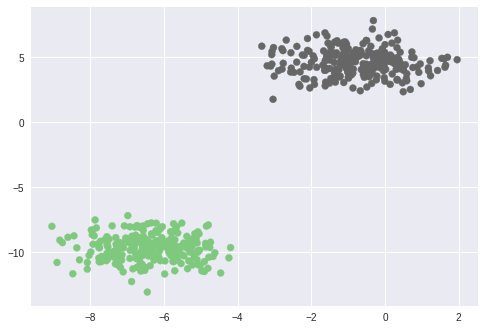

In [137]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

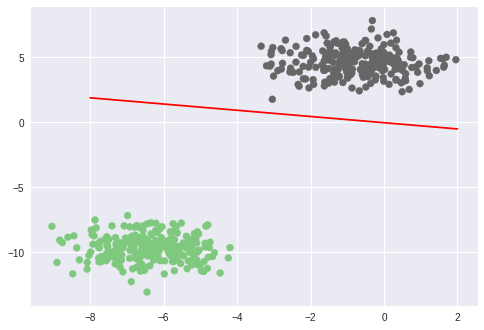

In [138]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [139]:
# Find the accuracy
Y_=getPredictions(X,weights,labels=True)
print(Y_)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.

In [140]:
print(Y)

[1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1
 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 

In [141]:
print(Y_==Y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [142]:
training_acc=np.sum(Y==Y_)/Y.shape[0]
print(training_acc)

1.0


### Generating Non Linear Data

In [109]:
from sklearn.datasets import make_moons

In [110]:
X,Y=make_moons?

In [ ]:
X,Y=make_moons

In [111]:
X,Y=make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)

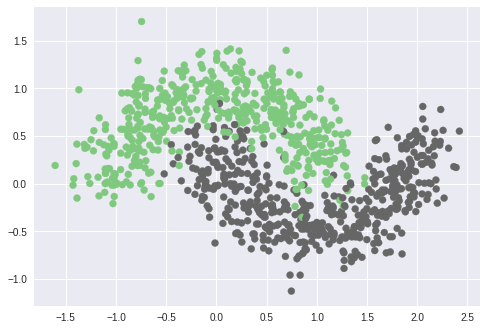

In [112]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

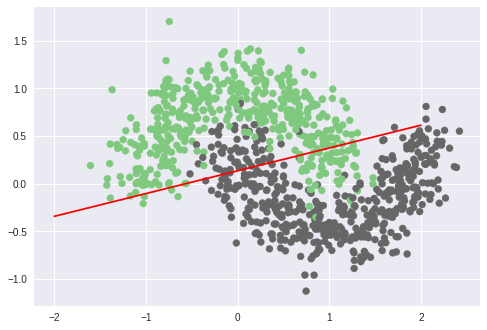

In [113]:
x1=np.linspace(-2,2,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]

plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [114]:
# Find the accuracy
Y_=getPredictions(X,weights,labels=True)
training_acc=np.sum(Y==Y_)/Y.shape[0]
print(training_acc)

0.869
